In [1]:
from tensorflow_addons.metrics import F1Score

In [2]:
import os
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization,Activation, concatenate, DepthwiseConv2D, Multiply,Dropout
from keras.layers import GlobalAveragePooling2D, Dense, MaxPooling2D,Flatten, Layer,BatchNormalization, Add,Reshape,AveragePooling2D

from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.optimizers import Adam


from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [3]:
input_shape = (224, 224, 3)

train_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Coursework\DR Datasets\DRD_Split\train'
test_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Coursework\DR Datasets\DRD_Split\test'

batch_size = 32
num_classes = 2
# filter_factor = 8

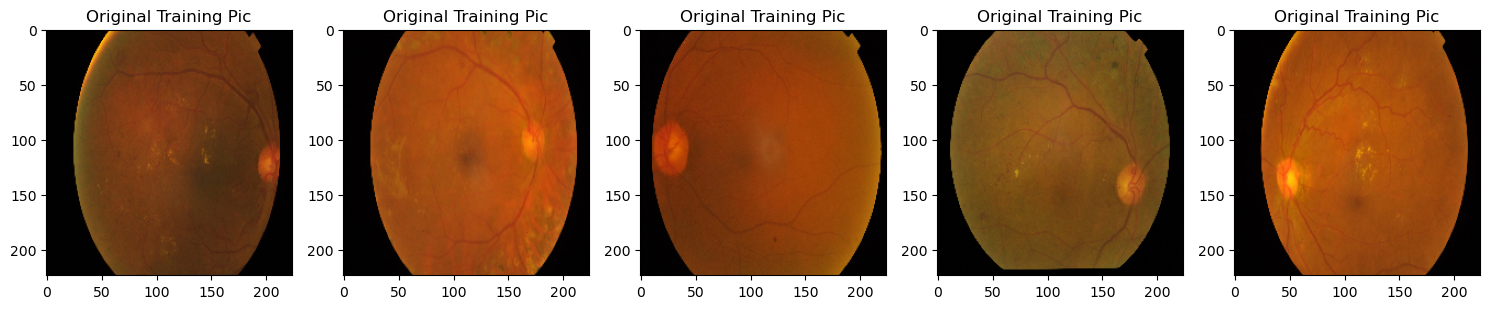

In [4]:
train_diabetic = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Coursework\DR Datasets\DRD_Split\train\diabetic'

#Show the import original image
train_img_files = os.listdir(train_diabetic)
# test_img_files = os.listdir(test_dir)
# val_img_files = os.listdir(val_dir)

show_num = 5

plt.figure(figsize = (15, 5))

for i in range(show_num):
    
    img_path = os.path.join(train_diabetic, train_img_files[i])
    img = plt.imread(img_path)
    plt.subplot(1, show_num, i + 1)
    plt.imshow(img)
    plt.axis('on')
    plt.title("Original Training Pic")
    
plt.tight_layout()
plt.show()


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.13,  # Specify the validation split here
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2708 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


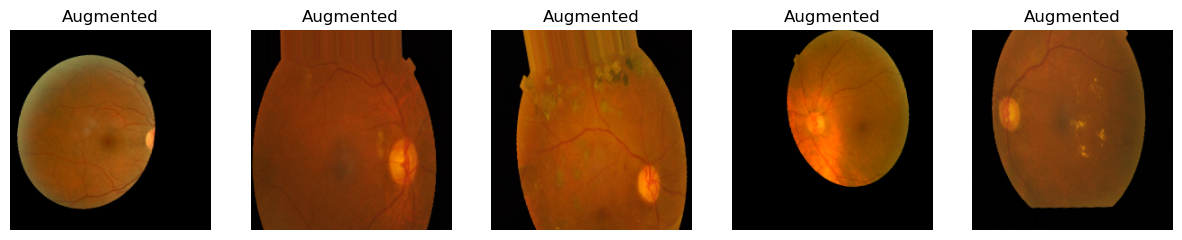

In [6]:
#To show the augmented pictures, after rotation, zoom in, rescale etc

# import scipy

# Extract a batch of images from the train_generator
sample_images, sample_labels = next(train_generator)

plt.figure(figsize = (15, 5))

# Show the original images from the batch
num_images_to_show = 5  # Show three images
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(sample_images[i-1])
    plt.title("Augmented")
    plt.axis('off')

In [7]:
from tensorflow.keras.applications import VGG16, ResNet50V2, InceptionV3
model =VGG16(weights ='imagenet', include_top=False, input_shape = input_shape)

In [8]:
for layer in model.layers:
    layer.trainable = False

#Adding custom Layers 
x = model.output

x = GlobalAveragePooling2D()(x)
outputs = Dense(2, activation="softmax")(x)

model_IR = Model(inputs=model.input, outputs = outputs)

In [9]:
lr = 0.001
Optimizer = Adam(learning_rate = lr)

from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow_addons.metrics import F1Score
from tensorflow.keras import backend as K




model_IR.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=[
        'accuracy', 
        Precision(), 
        Recall(), 
        AUC(), 
        F1Score(num_classes=2, average = 'micro')
    ]
)
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1,
                                patience = 10,
                                min_lr = 0.00001,
                                verbose = 1)
MODEL_NAME = "VGG16_Pretrained"  # 用您的模型名替换
# 训练合并后的模型
csv_logger = tf.keras.callbacks.CSVLogger(
    fr"C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Final Codes\Final Test\HistoryCSV\{MODEL_NAME}.csv", 
    separator=",", 
    append=False)

history = model_IR.fit(
    train_generator,
    epochs=100,  # 根据需要调整epochs数
    validation_data=validation_generator,
    callbacks=[csv_logger, lr_reduction]  # 添加 ModelCheckpoint 到回调列表
)



Epoch 1/100
339/339 [==============================] - 41s 107ms/step - loss: 0.5331 - accuracy: 0.7891 - precision: 0.7891 - recall: 0.7891 - auc: 0.8671 - f1_score: 0.7891 - val_loss: 0.4105 - val_accuracy: 0.8960 - val_precision: 0.8960 - val_recall: 0.8960 - val_auc: 0.9476 - val_f1_score: 0.8960 - lr: 0.0010
Epoch 2/100
339/339 [==============================] - 34s 100ms/step - loss: 0.3753 - accuracy: 0.8763 - precision: 0.8763 - recall: 0.8763 - auc: 0.9359 - f1_score: 0.8763 - val_loss: 0.3271 - val_accuracy: 0.8960 - val_precision: 0.8960 - val_recall: 0.8960 - val_auc: 0.9597 - val_f1_score: 0.8960 - lr: 0.0010
Epoch 3/100
339/339 [==============================] - 34s 100ms/step - loss: 0.3383 - accuracy: 0.8807 - precision: 0.8807 - recall: 0.8807 - auc: 0.9364 - f1_score: 0.8807 - val_loss: 0.3125 - val_accuracy: 0.8837 - val_precision: 0.8837 - val_recall: 0.8837 - val_auc: 0.9521 - val_f1_score: 0.8837 - lr: 0.0010
Epoch 4/100
339/339 [==============================] - 

Epoch 27/100
339/339 [==============================] - 37s 110ms/step - loss: 0.2437 - accuracy: 0.9165 - precision: 0.9165 - recall: 0.9165 - auc: 0.9626 - f1_score: 0.9165 - val_loss: 0.2080 - val_accuracy: 0.9257 - val_precision: 0.9257 - val_recall: 0.9257 - val_auc: 0.9750 - val_f1_score: 0.9257 - lr: 0.0010
Epoch 28/100
339/339 [==============================] - 36s 106ms/step - loss: 0.2368 - accuracy: 0.9117 - precision: 0.9117 - recall: 0.9117 - auc: 0.9645 - f1_score: 0.9117 - val_loss: 0.1936 - val_accuracy: 0.9480 - val_precision: 0.9480 - val_recall: 0.9480 - val_auc: 0.9805 - val_f1_score: 0.9480 - lr: 0.0010
Epoch 29/100
339/339 [==============================] - 35s 104ms/step - loss: 0.2455 - accuracy: 0.9140 - precision: 0.9140 - recall: 0.9140 - auc: 0.9616 - f1_score: 0.9140 - val_loss: 0.2098 - val_accuracy: 0.9332 - val_precision: 0.9332 - val_recall: 0.9332 - val_auc: 0.9752 - val_f1_score: 0.9332 - lr: 0.0010
Epoch 30/100
339/339 [==============================

Epoch 52/100
339/339 [==============================] - 35s 103ms/step - loss: 0.2301 - accuracy: 0.9225 - precision: 0.9225 - recall: 0.9225 - auc: 0.9663 - f1_score: 0.9225 - val_loss: 0.2020 - val_accuracy: 0.9332 - val_precision: 0.9332 - val_recall: 0.9332 - val_auc: 0.9741 - val_f1_score: 0.9332 - lr: 1.0000e-05
Epoch 53/100
339/339 [==============================] - 35s 103ms/step - loss: 0.2398 - accuracy: 0.9143 - precision: 0.9143 - recall: 0.9143 - auc: 0.9637 - f1_score: 0.9143 - val_loss: 0.1904 - val_accuracy: 0.9431 - val_precision: 0.9431 - val_recall: 0.9431 - val_auc: 0.9809 - val_f1_score: 0.9431 - lr: 1.0000e-05
Epoch 54/100
339/339 [==============================] - 35s 102ms/step - loss: 0.2233 - accuracy: 0.9184 - precision: 0.9184 - recall: 0.9184 - auc: 0.9689 - f1_score: 0.9184 - val_loss: 0.2056 - val_accuracy: 0.9307 - val_precision: 0.9307 - val_recall: 0.9307 - val_auc: 0.9753 - val_f1_score: 0.9307 - lr: 1.0000e-05
Epoch 55/100
339/339 [==================

Epoch 77/100
339/339 [==============================] - 35s 102ms/step - loss: 0.2356 - accuracy: 0.9210 - precision: 0.9210 - recall: 0.9210 - auc: 0.9646 - f1_score: 0.9210 - val_loss: 0.2118 - val_accuracy: 0.9282 - val_precision: 0.9282 - val_recall: 0.9282 - val_auc: 0.9756 - val_f1_score: 0.9282 - lr: 1.0000e-05
Epoch 78/100
339/339 [==============================] - 35s 103ms/step - loss: 0.2283 - accuracy: 0.9206 - precision: 0.9206 - recall: 0.9206 - auc: 0.9670 - f1_score: 0.9206 - val_loss: 0.2003 - val_accuracy: 0.9233 - val_precision: 0.9233 - val_recall: 0.9233 - val_auc: 0.9785 - val_f1_score: 0.9233 - lr: 1.0000e-05
Epoch 79/100
339/339 [==============================] - 35s 102ms/step - loss: 0.2270 - accuracy: 0.9177 - precision: 0.9177 - recall: 0.9177 - auc: 0.9673 - f1_score: 0.9177 - val_loss: 0.1883 - val_accuracy: 0.9530 - val_precision: 0.9530 - val_recall: 0.9530 - val_auc: 0.9801 - val_f1_score: 0.9530 - lr: 1.0000e-05
Epoch 80/100
339/339 [==================

In [10]:
# history = model_IR.fit(train_generator, epochs = 100, validation_data=(validation_generator), callbacks = [lr_reduction, early_stopping])

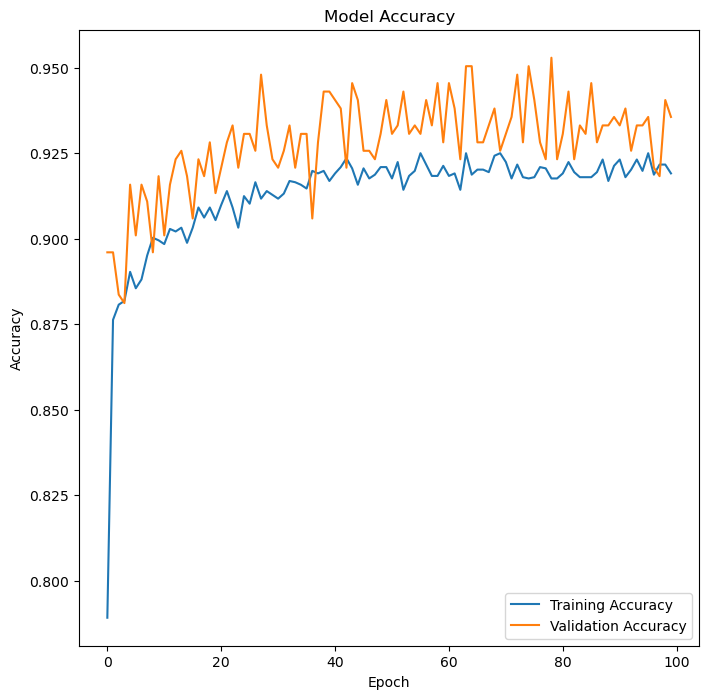

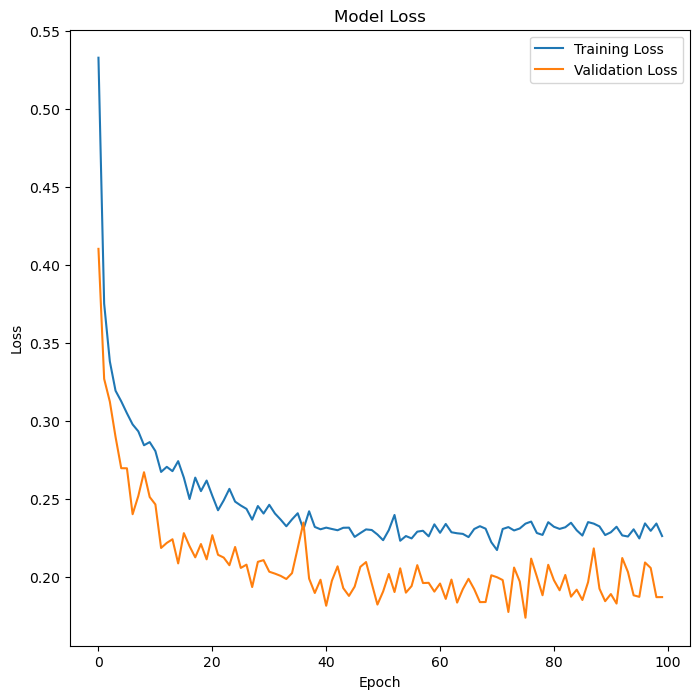

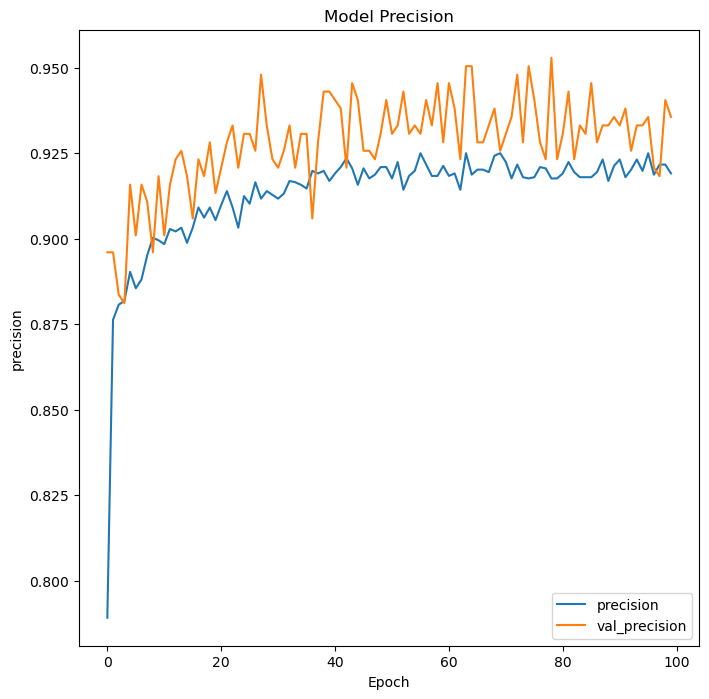

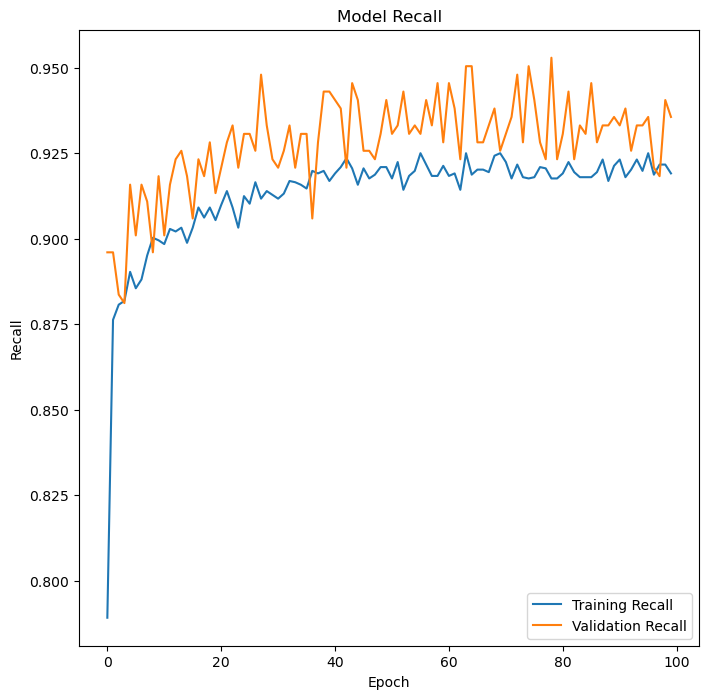

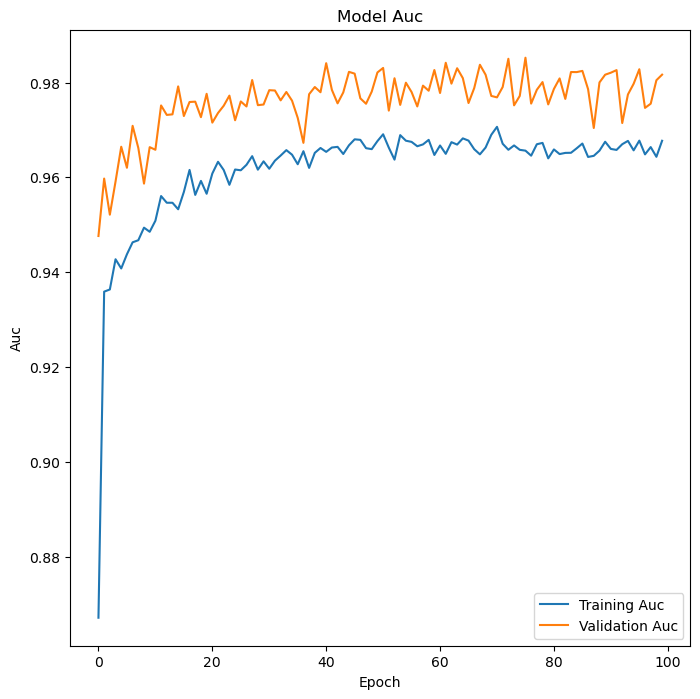

In [11]:
plt.figure(figsize = (8, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()


plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend(['precision', 'val_precision'], loc = 'lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'],loc='lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Auc')
plt.xlabel('Epoch')
plt.ylabel('Auc')
plt.legend(['Training Auc', 'Validation Auc'],loc='lower right')
plt.show()

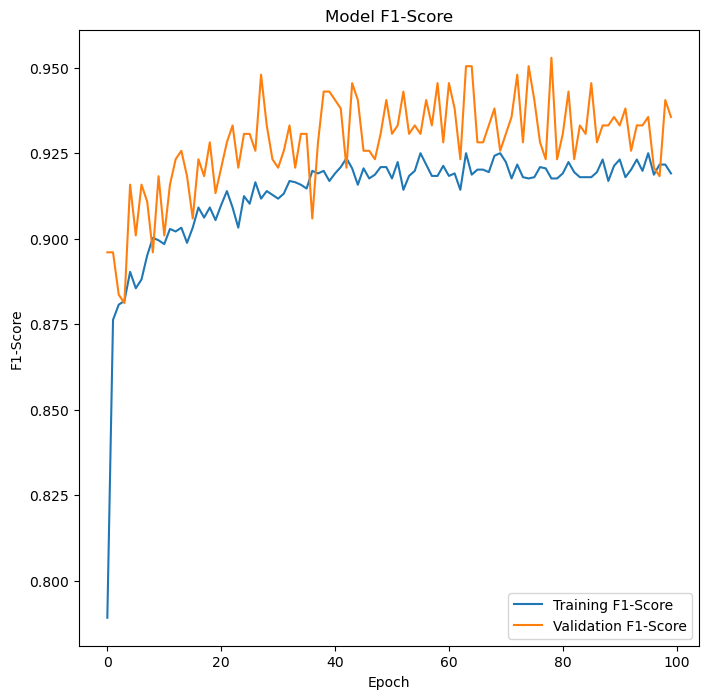

In [12]:
plt.figure(figsize =(8, 8))
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.legend(['Training F1-Score', 'Validation F1-Score'], loc= 'lower right')
plt.show()


17/17 [==============================] - 4s 118ms/step


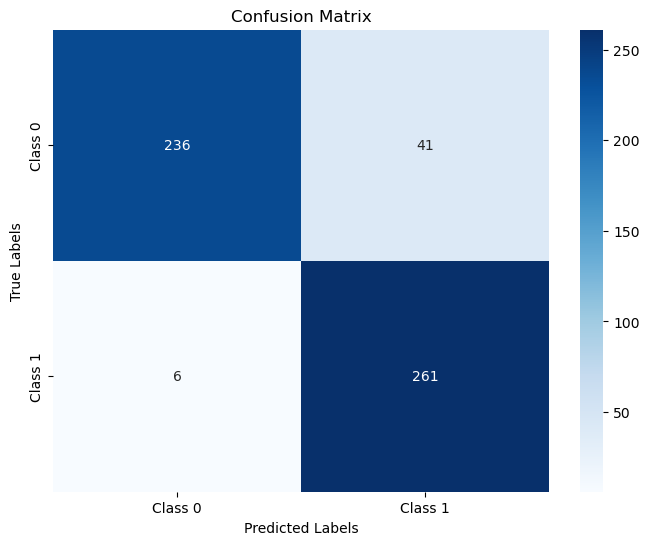

In [13]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 收集图像和真实标签
all_images, all_true_labels = zip(*[next(test_generator) for _ in range(test_generator.samples // test_generator.batch_size)])
all_images = np.concatenate(all_images)
all_true_labels = np.argmax(np.concatenate(all_true_labels), axis=1)

# 进行预测并获取预测标签
predictions = model_IR.predict(all_images)
predicted_labels = np.argmax(predictions, axis=1)

# 生成并绘制混淆矩阵
conf_matrix = confusion_matrix(all_true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [14]:
from sklearn.metrics import f1_score


# 计算F1-Score
f1 = f1_score(all_true_labels, predicted_labels, average='macro')

print("F1-Score:", f1)


f1_each_class = f1_score(all_true_labels, predicted_labels, average=None)
print("F1-Score for each class:", f1_each_class)


F1-Score: 0.9134200893295543
F1-Score for each class: [0.90944123 0.91739895]


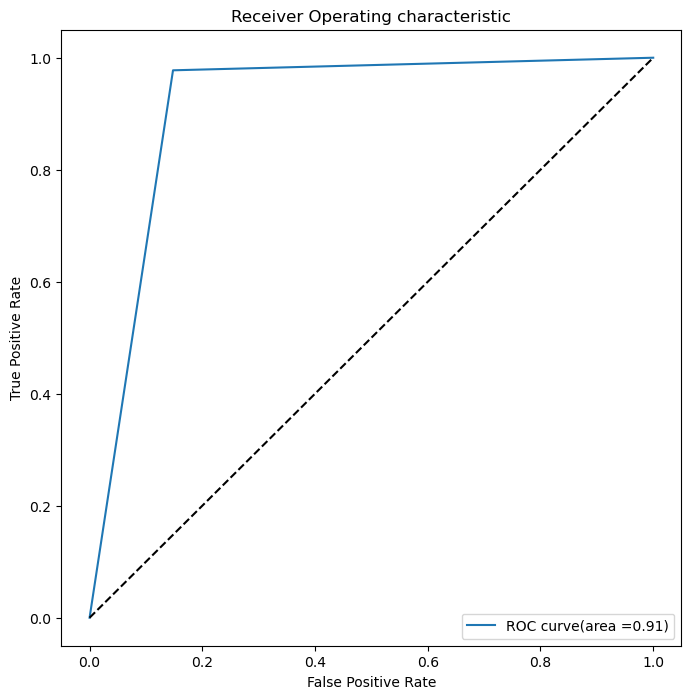

In [15]:
#compute precision-recall score
from sklearn.metrics import roc_curve, auc

#compute precision, recall(sensitivity), and threshold values
fpr, tpr, thresholds = roc_curve(all_true_labels, predicted_labels)

#compute the AUC score
roc_auc= auc(fpr, tpr)

#plot the precision-recall curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label= 'ROC curve(area =%0.2f)' %roc_auc)
plt.plot([0, 1], [0,1], 'k--')
plt.title('Receiver Operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [16]:
#compute sensitivity and specificity
sensitivity=tpr[1] #True positive rate 
specificity= 1-fpr[1]

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.9775280898876404
specificity: 0.851985559566787


17/17 [==============================] - 2s 125ms/step


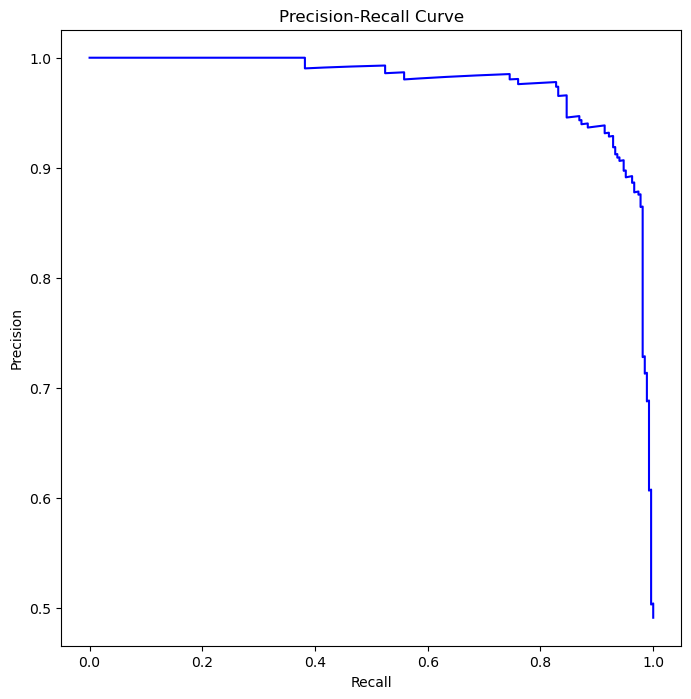

In [17]:
from sklearn.metrics import precision_recall_curve

# 计算预测概率
ensemble_pred_probs = model_IR.predict(all_images)

# 获取预测正类的概率
# 假设是二分类问题，并且正类是第二个类别
positive_class_probs = ensemble_pred_probs[:, 1]

# 计算 Precision 和 Recall
precision, recall, thresholds = precision_recall_curve(all_true_labels, positive_class_probs)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [18]:
test_loss, test_acc, test_precision, test_recall, test_auc, test_f1_score = model_IR.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test AUC:', test_auc)
print('Test F1 Score:', test_f1_score)

69/69 [==============================] - 5s 66ms/step - loss: 0.2735 - accuracy: 0.9145 - precision: 0.9145 - recall: 0.9145 - auc: 0.9520 - f1_score: 0.9145
Test loss: 0.2734668552875519
Test accuracy: 0.914545476436615
Test precision: 0.914545476436615
Test recall: 0.914545476436615
Test AUC: 0.9520198702812195
Test F1 Score: 0.914545476436615


In [19]:
from sklearn.metrics import classification_report

# 使用模型对验证集进行预测，获取预测概率
y_pred_probs = model_IR.predict(all_images)

# 将预测概率转换为类别标签
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 假设 y_val 是真实标签，并且也是类别标签形式
# 现在您可以生成分类报告
report = classification_report(all_true_labels, y_pred_labels)
print(report)


17/17 [==============================] - 2s 125ms/step
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       277
           1       0.86      0.98      0.92       267

    accuracy                           0.91       544
   macro avg       0.92      0.91      0.91       544
weighted avg       0.92      0.91      0.91       544



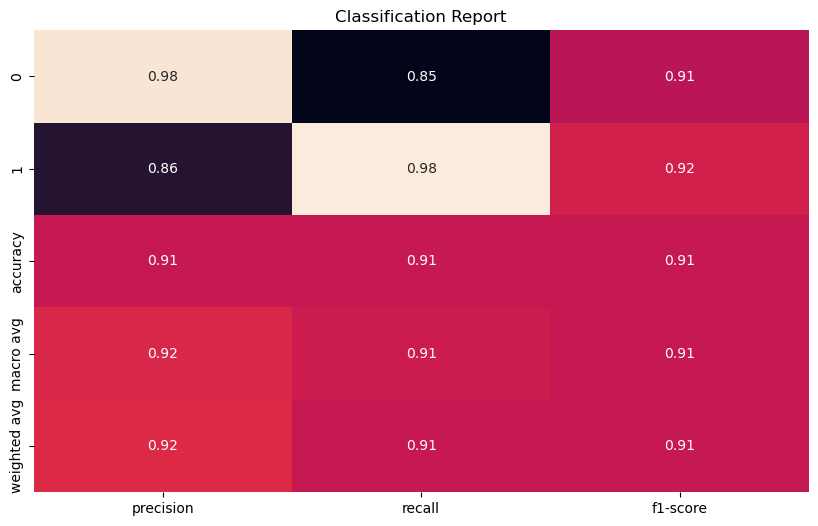

In [20]:
import pandas as pd


# Generate a classification report (replace this with your actual data)
report = classification_report(all_true_labels, y_pred_labels, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column, as it's not suitable for the heatmap
report_df = report_df.drop(columns=['support'])

# Draw the heatmap with the default colormap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cbar=False)
plt.title("Classification Report")
plt.show()



def generate_grad_cam(ensemble_model, img_array, target_layer, output_layer):
    grad_model = Model(
        [ensemble_model.inputs],
        [ensemble_model.get_layer(target_layer).output, ensemble_model.get_layer(output_layer).output]
    )

    with tf.GradientTape() as tape:
        conv_output, model_output = grad_model(img_array)
        loss = model_output[:, 1]  
    grads = tape.gradient(loss, conv_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        conv_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)

    heatmap /= np.max(heatmap)
    return heatmap

output_layer_name1 = model1.output.name.split("/")[0]
output_layer_name2 = model2.output.name.split("/")[0]

num_images = 5

for i in range(num_images):
    batch = next(test_generator)

    img_array = batch[0]
    label = batch[1]
    #conv2d_8,multiply_9 ,multiply_10,add_3 (Add)

    heatmap1 = generate_grad_cam(model1, img_array, 'conv2d_8', output_layer_name1)
    heatmap2 = generate_grad_cam(model2, img_array, 'add_3', output_layer_name2)

    target_size = max(heatmap1.shape[0], heatmap2.shape[0]), max(heatmap1.shape[1], 
                                                                                    heatmap2.shape[1])
    heatmap1_resized = tf.image.resize(heatmap1[..., np.newaxis], target_size)[..., 0]
    heatmap2_resized = tf.image.resize(heatmap2[..., np.newaxis], target_size)[..., 0]
    # heatmap3_resized = tf.image.resize(heatmap3[..., np.newaxis], target_size)[..., 0]
    
    heatmap = (heatmap1_resized + heatmap2_resized) / 2.0

    heatmap_resized = tf.image.resize(heatmap[..., np.newaxis], (224, 224))[..., 0]
    heatmap_weighted = heatmap_resized * 1

    weighted_img = heatmap_weighted[..., np.newaxis] * img_array[0]
    weighted_img /= np.max(weighted_img) 

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_array[0])
    plt.title(f'Original Image (Label: {label[0]})')

    plt.subplot(1, 3, 2)
    plt.imshow(weighted_img[..., 0],cmap='jet')
    plt.title('Weighted Image')

    plt.show()


In [21]:
#delete the model to prevent memory costs

from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model_IR


from numba import cuda

cuda.select_device(0)
cuda.close()